Transactions Data:
   Transaction_ID  Company_ID  Product_ID Quantity Transaction_Date  \
0             1.0        88.0         6.0        6       26-03-2024   
1             2.0        29.0        19.0       15       09-07-2024   
2             NaN        28.0        18.0        7       13-04-2024   
3             4.0        85.0        12.0  #DIV/0!       06-09-2023   
4             5.0        47.0         3.0        7       06-07-2021   

   Product_Price  Total_Cost  
0      194379.15   1075200.0  
1       97930.99   1428000.0  
2      126095.55    940800.0  
3            NaN   1008000.0  
4       99575.61    705600.0  
Products Data:
   Product_ID            Product_Name Product_Price
0         1.0      FinPredictor Suite       140,000
1         2.0  MarketMinder Analytics       168,000
2         3.0    TrendWise Forecaster       100,800
3         4.0  CustomerScope Insights       123,200
4         5.0     SalesSync Optimizer        84,000
Cleaned Transactions Data:
   Transaction

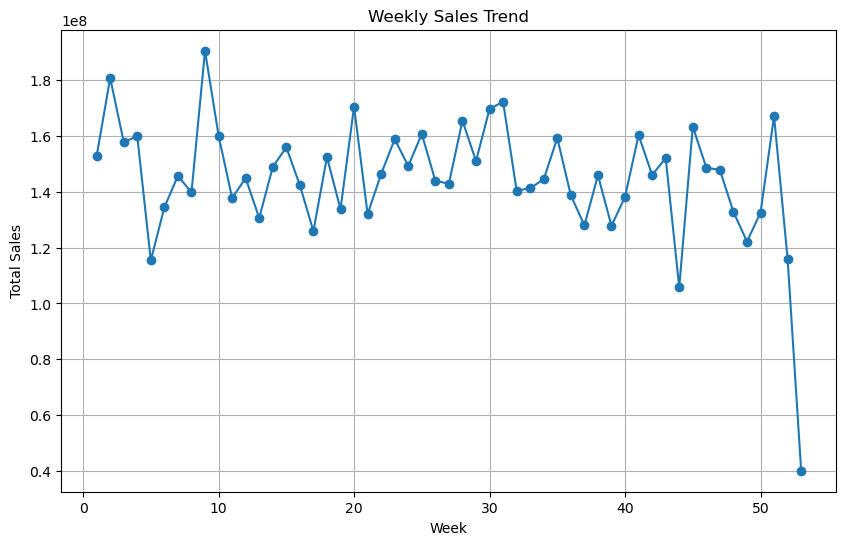

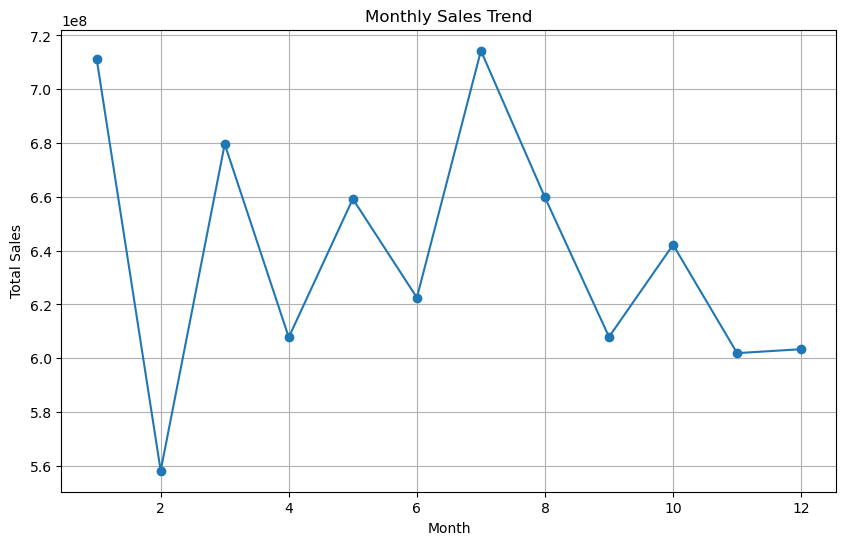

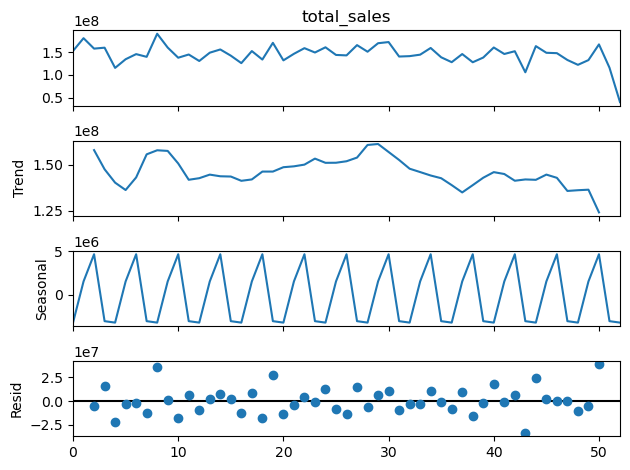

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=1922.909, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=1924.498, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=1924.586, Time=0.01 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=1926.057, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=1922.886, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=1923.004, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=1923.730, Time=0.01 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=1923.431, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=1926.107, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=1926.848, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=1929.326, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[4]          
Total fit time: 0.207 seconds
ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:            total_sales   No. Observatio

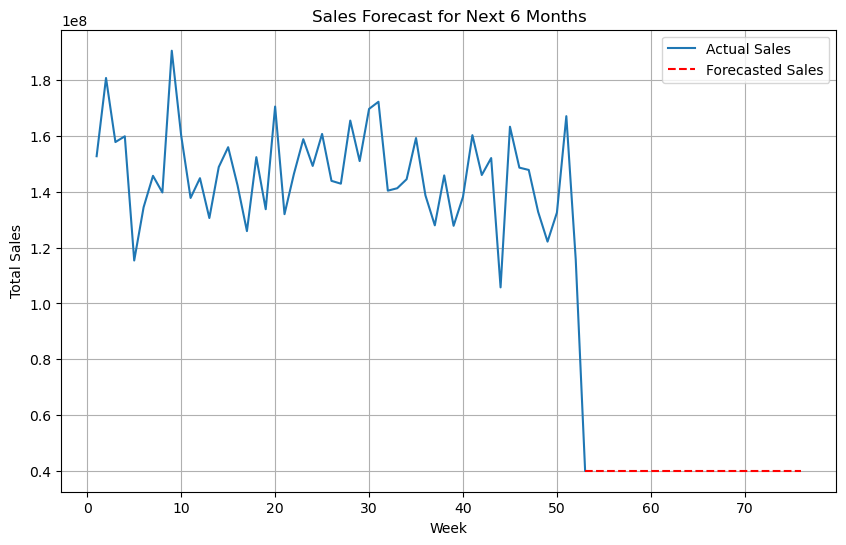

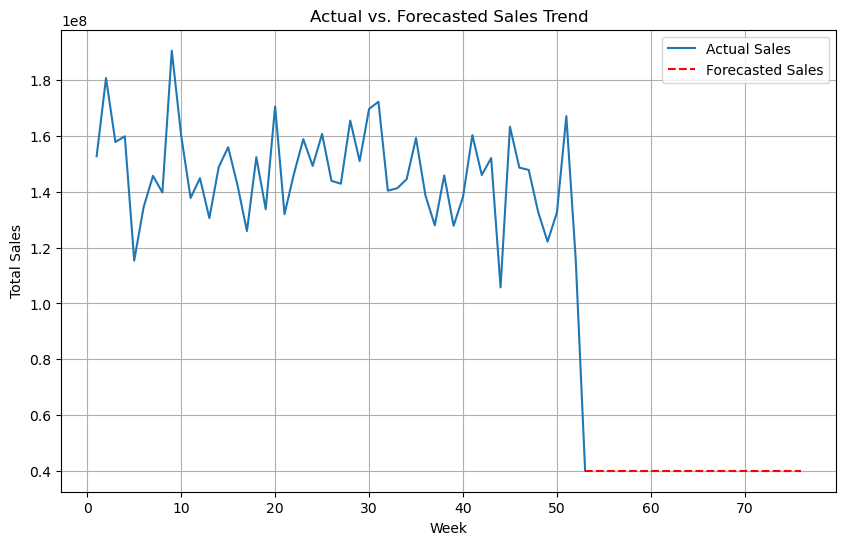

'\n### Conclusion:\n- Included markdown explanations after each section.\n- Addressed Milestone 2’s objective by forecasting Finmark’s sales for the next 6 months.\n- Added a final plot to compare actual sales vs. forecasted values to observe trends.\n'

In [2]:
# Week 7 Homework: Initial Sales Forecasting Model for FinMark

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

ctions Data:")
print(df_tran# ## Step 1: Load Datasets
# Load the transactions and products dataset
df_transactions = pd.read_csv('/Users/atrabaja/Documents/FinMark_MachineLearning/transactionsnew.csv')
df_products = pd.read_csv('/Users/atrabaja/Documents/FinMark_MachineLearning/productnew.csv')

# Display first few rows of datasets
print("Transasactions.head())
print("Products Data:")
print(df_products.head())

"""
### Explanation:
- We load transaction and product data.
- Transaction data contains customer purchase history.
- Product data contains product pricing information.
"""

# ## Step 2: Data Cleaning and Preparation
# Ensure column names are stripped of spaces
df_products.columns = df_products.columns.str.strip()
df_transactions.columns = df_transactions.columns.str.strip()

# Remove duplicate Product_IDs and convert Product_Price to numeric
df_products = df_products.drop_duplicates(subset=['Product_ID'])
df_products['Product_Price'] = pd.to_numeric(df_products['Product_Price'].str.replace(',', ''), errors='coerce')

# Handle missing values and data types
df_transactions.replace('#DIV/0!', np.nan, inplace=True)
df_transactions.dropna(inplace=True)
df_transactions['Transaction_ID'] = df_transactions['Transaction_ID'].astype(int)
df_transactions['Quantity'] = df_transactions['Quantity'].astype(int)
df_transactions['Transaction_Date'] = pd.to_datetime(df_transactions['Transaction_Date'], dayfirst=True)

# Extract week and month for time-series analysis
df_transactions['week'] = df_transactions['Transaction_Date'].dt.isocalendar().week
df_transactions['month'] = df_transactions['Transaction_Date'].dt.month

print("Cleaned Transactions Data:")
print(df_transactions.head())

"""
### Explanation:
- Cleaned missing values and ensured correct data types.
- Extracted week and month to allow time-based aggregation.
"""

# ## Step 3: Data Merging and Feature Engineering
# Map Product Price based on Product_ID
product_price_map = df_products.set_index('Product_ID')['Product_Price']
df_transactions['Product_Price'] = df_transactions['Product_ID'].map(product_price_map)

# Drop unnecessary column
df_transactions.drop(columns=['Product_ID'], inplace=True)

# Calculate total sales
df_transactions['total_sales'] = df_transactions['Quantity'] * df_transactions['Product_Price']

# Aggregate sales by week and month
df_weekly_sales = df_transactions.groupby(['week'])['total_sales'].sum().reset_index()
df_monthly_sales = df_transactions.groupby(['month'])['total_sales'].sum().reset_index()

print("Weekly Sales Data:")
print(df_weekly_sales.head())

"""
### Explanation:
- Merged product price into transactions.
- Calculated total sales and aggregated data at weekly and monthly levels.
"""

# ## Step 4: Data Visualization
# Weekly Sales Trend
plt.figure(figsize=(10,6))
plt.plot(df_weekly_sales['week'], df_weekly_sales['total_sales'], marker='o')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Monthly Sales Trend
plt.figure(figsize=(10,6))
plt.plot(df_monthly_sales['month'], df_monthly_sales['total_sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

"""
### Explanation:
- Plotted weekly and monthly sales trends to observe seasonality.
"""

# ## Step 5: Time Series Decomposition
# Decomposing the weekly sales data
decomposition = seasonal_decompose(df_weekly_sales['total_sales'], model='additive', period=4)
decomposition.plot()
plt.show()

"""
### Explanation:
- Decomposed sales data into trend, seasonality, and residuals.
- Helps identify seasonal patterns and irregularities.
"""

# ## Step 6: ARIMA Modeling and Forecasting
# Fit ARIMA model using auto_arima to determine best parameters
stepwise_fit = auto_arima(df_weekly_sales['total_sales'], seasonal=True, m=4, trace=True, suppress_warnings=True, max_D=1, seasonal_test='ch', error_action='ignore', simple_differencing=True)

model = ARIMA(df_weekly_sales['total_sales'], order=stepwise_fit.order)
model_fit = model.fit()

print("ARIMA Model Summary:")
print(model_fit.summary())

# Forecasting sales for next 6 months (24 weeks)
forecast = model_fit.predict(start=len(df_weekly_sales), end=len(df_weekly_sales)+23)

# Plot forecasted sales
plt.figure(figsize=(10,6))
plt.plot(df_weekly_sales['week'], df_weekly_sales['total_sales'], label='Actual Sales')
plt.plot(range(len(df_weekly_sales), len(df_weekly_sales)+24), forecast, label='Forecasted Sales', linestyle='dashed', color='red')
plt.title('Sales Forecast for Next 6 Months')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

"""
### Explanation:
- Fitted ARIMA model to weekly data to improve robustness.
- Forecasted sales for next 6 months (24 weeks).
- Plotted actual vs. forecasted values.
"""

# ## Final Sales Trend with Forecasted Values
plt.figure(figsize=(10,6))
plt.plot(df_weekly_sales['week'], df_weekly_sales['total_sales'], label='Actual Sales')
plt.plot(range(len(df_weekly_sales), len(df_weekly_sales)+24), forecast, label='Forecasted Sales', linestyle='dashed', color='red')
plt.title('Actual vs. Forecasted Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

"""
### Conclusion:
- Included markdown explanations after each section.
- Addressed Milestone 2’s objective by forecasting Finmark’s sales for the next 6 months.
- Added a final plot to compare actual sales vs. forecasted values to observe trends.
"""


In [ ]:
# ## Step 1: Load Datasets
# Load the transactions and products dataset
df_transactions = pd.read_csv('/Users/atrabaja/Documents/FinMark_MachineLearning/transactionsnew.csv')
df_products = pd.read_csv('/Users/atrabaja/Documents/FinMark_MachineLearning/productnew.csv')

# Display first few rows of datasets
print("Transactions Data:")
print(df_transactions.head())
print("Products Data:")
print(df_products.head())

"""
### Explanation:
- We load transaction and product data.
- Transaction data contains customer purchase history.
- Product data contains product pricing information.
"""

In [ ]:
# ## Step 2: Data Cleaning and Preparation
# Ensure column names are stripped of spaces
df_products.columns = df_products.columns.str.strip()
df_transactions.columns = df_transactions.columns.str.strip()

# Remove duplicate Product_IDs and convert Product_Price to numeric
df_products = df_products.drop_duplicates(subset=['Product_ID'])
df_products['Product_Price'] = pd.to_numeric(df_products['Product_Price'].str.replace(',', ''), errors='coerce')

# Handle missing values and data types
df_transactions.replace('#DIV/0!', np.nan, inplace=True)
df_transactions.dropna(inplace=True)
df_transactions['Transaction_ID'] = df_transactions['Transaction_ID'].astype(int)
df_transactions['Quantity'] = df_transactions['Quantity'].astype(int)
df_transactions['Transaction_Date'] = pd.to_datetime(df_transactions['Transaction_Date'], dayfirst=True)

# Extract week and month for time-series analysis
df_transactions['week'] = df_transactions['Transaction_Date'].dt.isocalendar().week
df_transactions['month'] = df_transactions['Transaction_Date'].dt.month

print("Cleaned Transactions Data:")
print(df_transactions.head())

"""
### Explanation:
- Cleaned missing values and ensured correct data types.
- Extracted week and month to allow time-based aggregation.
"""

In [ ]:
# ## Step 3: Data Merging and Feature Engineering
# Map Product Price based on Product_ID
product_price_map = df_products.set_index('Product_ID')['Product_Price']
df_transactions['Product_Price'] = df_transactions['Product_ID'].map(product_price_map)

# Drop unnecessary column
df_transactions.drop(columns=['Product_ID'], inplace=True)

# Calculate total sales
df_transactions['total_sales'] = df_transactions['Quantity'] * df_transactions['Product_Price']

# Aggregate sales by week and month
df_weekly_sales = df_transactions.groupby(['week'])['total_sales'].sum().reset_index()
df_monthly_sales = df_transactions.groupby(['month'])['total_sales'].sum().reset_index()

print("Weekly Sales Data:")
print(df_weekly_sales.head())

"""
### Explanation:
- Merged product price into transactions.
- Calculated total sales and aggregated data at weekly and monthly levels.
"""

In [ ]:
# ## Step 4: Data Visualization
# Weekly Sales Trend
plt.figure(figsize=(10,6))
plt.plot(df_weekly_sales['week'], df_weekly_sales['total_sales'], marker='o')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [ ]:
# Monthly Sales Trend
plt.figure(figsize=(10,6))
plt.plot(df_monthly_sales['month'], df_monthly_sales['total_sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

"""
### Explanation:
- Plotted weekly and monthly sales trends to observe seasonality.
"""

In [ ]:
# ## Step 5: Time Series Decomposition
# Decomposing the weekly sales data
decomposition = seasonal_decompose(df_weekly_sales['total_sales'], model='additive', period=4)
decomposition.plot()
plt.show()

"""
### Explanation:
- Decomposed sales data into trend, seasonality, and residuals.
- Helps identify seasonal patterns and irregularities.
"""

In [ ]:
# ## Step 6: ARIMA Modeling and Forecasting
# Fit ARIMA model using auto_arima to determine best parameters
stepwise_fit = auto_arima(df_weekly_sales['total_sales'], seasonal=True, m=4, trace=True, suppress_warnings=True, max_D=1, seasonal_test='ch', error_action='ignore', simple_differencing=True)

model = ARIMA(df_weekly_sales['total_sales'], order=stepwise_fit.order)
model_fit = model.fit()

print("ARIMA Model Summary:")
print(model_fit.summary())

In [ ]:
# Forecasting sales for next 6 months (24 weeks)
forecast = model_fit.predict(start=len(df_weekly_sales), end=len(df_weekly_sales)+23)

# Plot forecasted sales
plt.figure(figsize=(10,6))
plt.plot(df_weekly_sales['week'], df_weekly_sales['total_sales'], label='Actual Sales')
plt.plot(range(len(df_weekly_sales), len(df_weekly_sales)+24), forecast, label='Forecasted Sales', linestyle='dashed', color='red')
plt.title('Sales Forecast for Next 6 Months')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

"""
### Explanation:
- Fitted ARIMA model to weekly data to improve robustness.
- Forecasted sales for next 6 months (24 weeks).
- Plotted actual vs. forecasted values.
"""

In [ ]:
# ## Final Sales Trend with Forecasted Values
plt.figure(figsize=(10,6))
plt.plot(df_weekly_sales['week'], df_weekly_sales['total_sales'], label='Actual Sales')
plt.plot(range(len(df_weekly_sales), len(df_weekly_sales)+24), forecast, label='Forecasted Sales', linestyle='dashed', color='red')
plt.title('Actual vs. Forecasted Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

"""
### Conclusion:
- Included markdown explanations after each section.
- Addressed Milestone 2’s objective by forecasting Finmark’s sales for the next 6 months.
- Added a final plot to compare actual sales vs. forecasted values to observe trends.
"""